  0 :  2
  1 :  3
  2 :  4
  3 :  5
  4 :  5
  5 :  2
  6 :  6
  7 :  4
  8 :  3
  9 :  5
  10 :  3


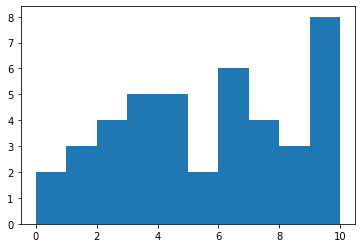

  0 :  2
  1 :  3
  2 :  4
  3 :  5
  4 :  5
  5 :  2
  6 :  6
  7 :  4
  8 :  3
  9 :  5
  10 :  3
{"0": 2, "1": 3, "2": 4, "3": 5, "4": 5, "5": 2, "6": 6, "7": 4, "8": 3, "9": 5, "10": 3}


In [4]:

import matplotlib.pyplot as plt
import numpy as np
import json
def CountFrequency(my_list): 
  
    freq = {} 
    my_list.sort()
    #begin with sort dictionary
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1

    for key, value in freq.items(): 
        print (*[" ", key, ": ", value]) 

    return freq;

my_list =[2,4,6,8,4,5,2,1,9,0,4,6,7,4,3,2,1,9,10,3,7,9,6,0,1,3,5,6,7,8,9,10,2,3,6,8,9,10,6,7,4,3] 
SetFrequency = CountFrequency(my_list)

plt.hist(my_list) 
plt.show()

json_object = json.dumps(CountFrequency(my_list))
print(json_object)

In [5]:
import pandas as pd

df = pd.read_csv('ViewingActivity.csv')

In [6]:
df.shape

(200, 10)

In [7]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013/3/20 5:17,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)


In [8]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Start Time,Duration,Title
0,2013/3/20 5:17,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [9]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [10]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [11]:
df = df.set_index('Start Time')
df.index = df.index.tz_convert('US/Eastern')
df = df.reset_index()
df.head(1)

,Start Time,Duration,Title
0,2013-03-20 01:17:00-04:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [12]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [13]:
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]

In [14]:
office.shape

(137, 3)

In [15]:
office = office[(office['Duration'] > '0 days 00:01:00')]
office.shape

(130, 3)

In [16]:
office['Duration'].sum()

Timedelta('1 days 14:57:28')

In [17]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour
office.head(1)

,Start Time,Duration,Title,weekday,hour
10,2013-03-18 19:04:00-04:00,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,0,19


In [18]:
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'TV Shows Watched by Day'}>

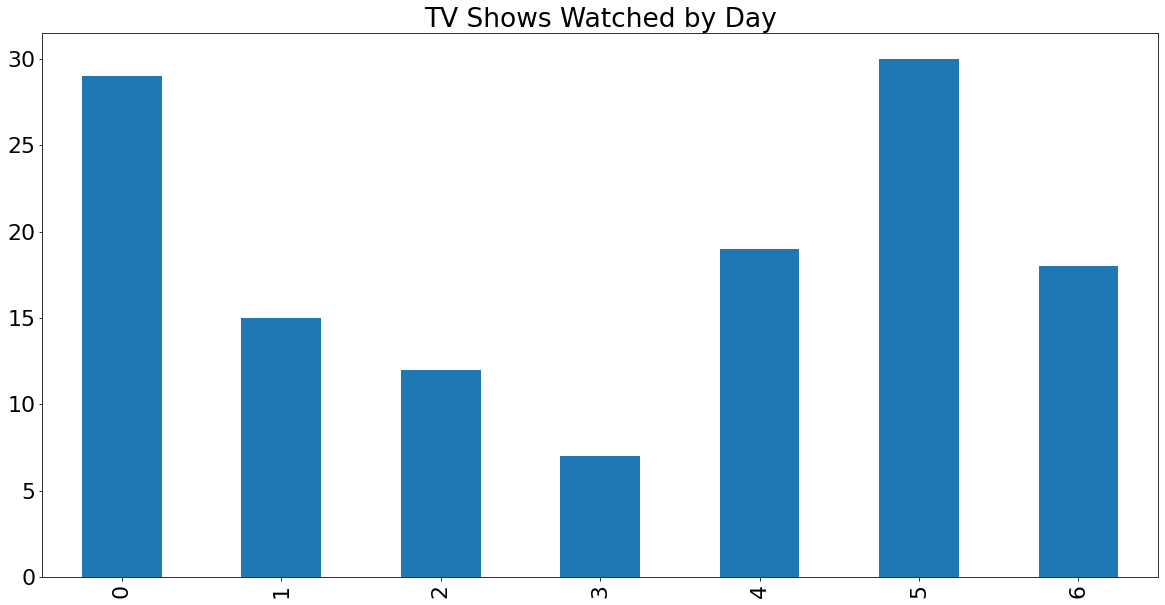

In [19]:
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)


office_by_day = office['weekday'].value_counts()

office_by_day = office_by_day.sort_index()
matplotlib.rcParams.update({'font.size': 22})

office_by_day.plot(kind='bar', figsize=(20,10), title='TV Shows Watched by Day')

<AxesSubplot:title={'center':'TV Shows Watched by Hour'}>

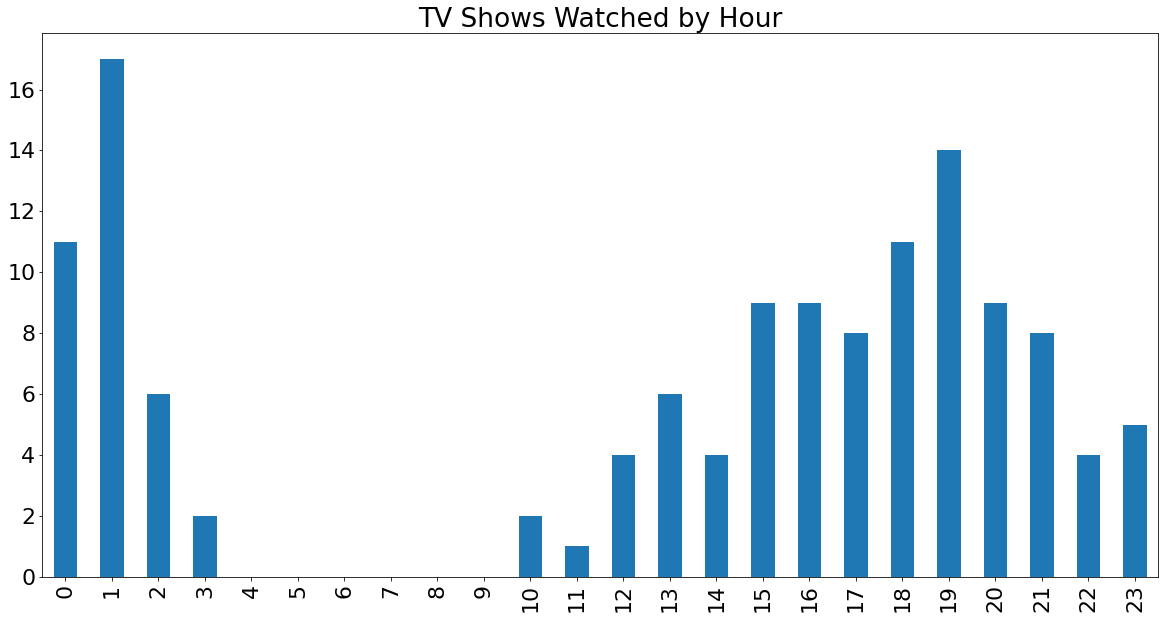

In [21]:
office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)


office_by_hour = office['hour'].value_counts()
office_by_hour = office_by_hour.sort_index()
office_by_hour.plot(kind='bar', figsize=(20,10), title='TV Shows Watched by Hour')